In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the scraped data from the CSV file
df = pd.read_csv(r'C:\Users\QB183AP\OneDrive - EY\Documents\Web Scraping\Yamini\richest_people.csv')

def convert_to_number(value):
    value = value.replace('$', '')  # Remove the dollar sign
    if 'Billion' in value:
        number = float(value.replace(' Billion', '')) * 1e9  # Convert to billions
    else:
        number = float(value)  # If no "Billion", treat as a regular number
    return number

# Apply the conversion function to the DataFrame column
df['Amount(in Billions)'] = df['worth'].apply(convert_to_number)
df['Amount(in Billions)'] = df['Amount(in Billions)'] / 1e9
df['Amount(in Billions)'] = df['Amount(in Billions)'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                249 non-null    object
 1   source               237 non-null    object
 2   url                  249 non-null    object
 3   worth                249 non-null    object
 4   Amount(in Billions)  249 non-null    int32 
dtypes: int32(1), object(4)
memory usage: 8.9+ KB


C:\Users\QB183AP\AppData\Local\Temp\ipykernel_44448\4188617151.py:29: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.max()


title                                              Zhou Qunfei Net Worth
url                    https://www.therichest.com/celebnetworth/polit...
worth                                                     $97.25 Billion
Amount(in Billions)                                                  200
dtype: object

In [18]:
# Fetch the top 5 richest people along with their name and source
sorted_df = df.sort_values(by='Amount(in Billions)', ascending=False)

top_richest = sorted_df.head(5)[['title', 'source', 'Amount(in Billions)']]

top_richest

,title,source,Amount(in Billions)
0,Vladimir Putin Net Worth,"Oil, Gas, Investments",200
1,Jeff Bezos Net Worth,Internet retailing (Amazon),196
2,Elon Musk Net Worth,"SpaceX, Tesla Motors and PayPal",163
3,The Mars Family Net Worth,"Food (Candy, Pet Food, Chocolates)",127
4,Bill Gates Net Worth,Microsoft,125


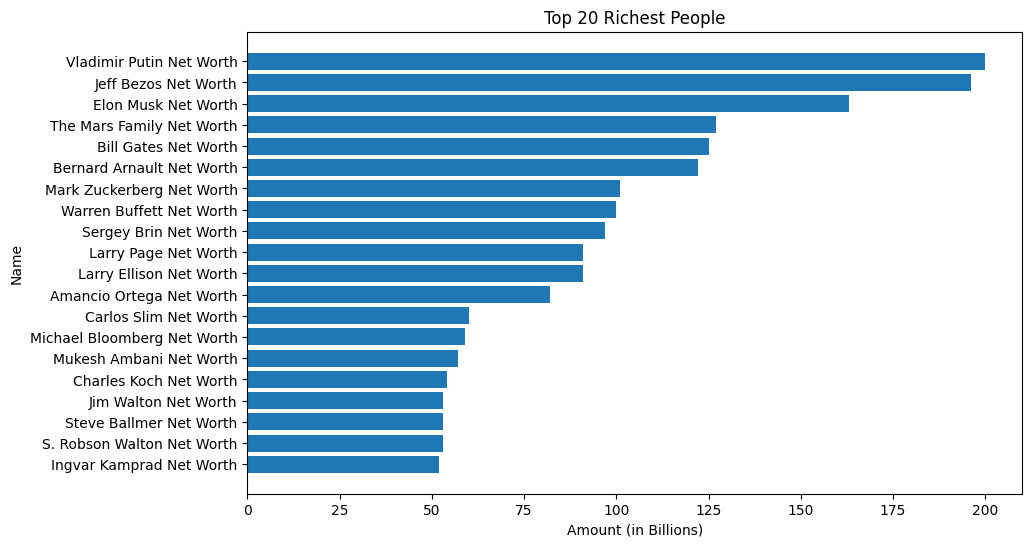

In [19]:
# Plotting the top 20 richest people along with their name and amount
sorted_df = df.sort_values(by='Amount(in Billions)', ascending=False)

# Fetch the top 20 richest people along with their name and amount
top_20_richest = sorted_df.head(20)[['title', 'Amount(in Billions)']]

plt.figure(figsize=(10, 6))
plt.barh(top_20_richest['title'], top_20_richest['Amount(in Billions)'])
plt.xlabel('Amount (in Billions)')
plt.ylabel('Name')
plt.title('Top 20 Richest People')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest net worth at the top
plt.show()

In [20]:
# Filter the DataFrame to include only rows with worth greater than 100 billion
filtered_df = df[df['Amount(in Billions)'] > 100]

# Fetch the names of people with worth greater than 100 billion
names_greater_than_100b = filtered_df['title'].tolist()

print(names_greater_than_100b)

['Vladimir Putin Net Worth', 'Jeff Bezos Net Worth', 'Elon Musk Net Worth', 'The Mars Family Net Worth', 'Bill Gates Net Worth', 'Bernard Arnault Net Worth', 'Mark Zuckerberg Net Worth']


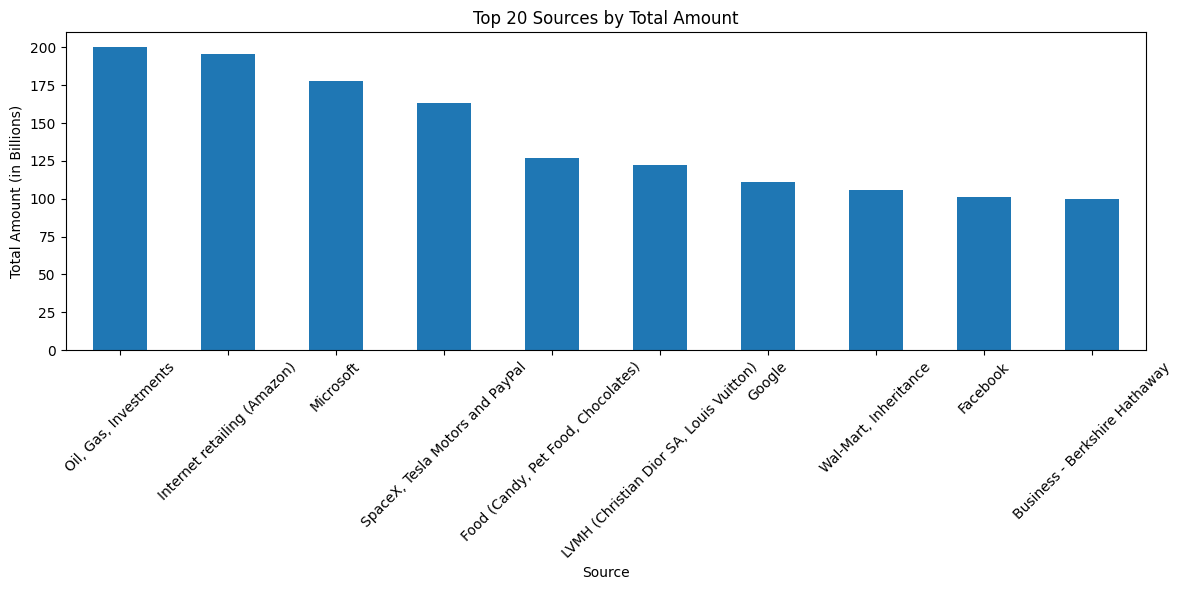

In [23]:
# Group the DataFrame by 'source' and sum the 'Amount(in Billions)' for each source
grouped_sources = df.groupby('source')['Amount(in Billions)'].sum()

# Sort the sources by total amount in descending order and select the top 20
top_20_sources = grouped_sources.sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))
top_20_sources.plot(kind='bar')
plt.xlabel('Source')
plt.ylabel('Total Amount (in Billions)')
plt.title('Top 20 Sources by Total Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Basically from this graph, we can say that Oil & Gas industry has the more money, and microsoft is on 3rd number and Google on 7th rank. Fashion industry is also one of the big money industry.